# Analysis of experiments

This notebook extracts the performance metrics.

## Retrieve metrics from mlflow

Retrieving all the metrics from mlflow. 
For simplicity and convenience, we read them manually and place them into a pandas df. 

In [1]:
# Necessary imports
import os
import pandas as pd
import numpy as np
from tqdm import tqdm

In [2]:
# ML Flow experiment dir
MLFLOW_DIR = "../mlruns/0/"

In [3]:
files = os.listdir(MLFLOW_DIR)

In [4]:
# Get columns for params and metrics
params = os.listdir(MLFLOW_DIR + files[0] + "/params/")
metrics = os.listdir(MLFLOW_DIR + files[0] + "/metrics/")

In [5]:
# Populate mlflow results
# (was done manually for compatibility)

all_values = []
for file in tqdm(files): 
    if '.' in file:
        continue
    value = {}
    for p in params: 
        with open(MLFLOW_DIR + file + "/params/" + p, "rt") as f:
            value[p] = f.read()
    for m in metrics: 
        try:
            with open(MLFLOW_DIR + file + "/metrics/" + m, "rt") as f:
                value[m] = f.read().split(" ")[1]
        except FileNotFoundError:
            value[m] = np.nan

    all_values += [value]

100%|███████████████████████████████████| 48653/48653 [00:17<00:00, 2858.54it/s]


In [6]:
df = pd.DataFrame(all_values)

In [7]:
df = df.apply(pd.to_numeric, errors="ignore")

In [8]:
# If needed, concat manually with previously produced & saved results.
# df2 = pd.read_csv("summary.csv")
# df = pd.concat([df, df2])

## Inspect result

Let's inspect some results (set the desired number of prototypes and method):

In [9]:
results_df = df[(df['n_prototypes']==10) & (df['method']=="repr")]

In [10]:
# We'll groupby everything except the seed
params_for_group = params.copy()
params_for_group.remove('seed')

In [11]:
agg_df = results_df.groupby(params_for_group).agg({'val_mse': [np.mean, np.std], 'test_mse': [np.mean, np.std]})

In [12]:
# Sort by validation accuracy
sorted_agg_df = agg_df.sort_values(by=('val_mse', 'mean'))
sorted_agg_df.head()

val_mse   
                                                                                          mean   
regularization scale method batch_size total_epochs learning_rate n_prototypes epoch             
0.0            0.5   repr   256        10           0.010         10           9      0.005571  \
                            32         10           0.005         10           9      0.005578   
                            256        10           0.010         10           8      0.005578   
                            32         10           0.005         10           8      0.005580   
                                                                               7      0.005584   

                                                                                                 
                                                                                           std   
regularization scale method batch_size total_epochs learning_rate n_prototypes epoch             
0.0            0.5   repr   256        10           0.010         10           9      0.000032  \
                            32         10           0.005         10           9      0.000042   
                            256        10           0.010         10           8      0.000033   
                            32         10           0.005         10           8      0.000042   
                                                                               7      0.000042   

                                                                                      test_mse   
                                                                                          mean   
regularization scale method batch_size total_epochs learning_rate n_prototypes epoch             
0.0            0.5   repr   256        10           0.010         10           9      0.006461  \
                            32         10           0.005         10           9      0.006357   
                            256        10           0.010         10           8      0.006471   
                            32         10           0.005         10           8      0.006364   
                                                                               7      0.006372   

                                                                                                
                                                                                           std  
regularization scale method batch_size total_epochs learning_rate n_prototypes epoch            
0.0            0.5   repr   256        10           0.010         10           9      0.000118  
                            32         10           0.005         10           9      0.000141  
                            256        10           0.010         10           8      0.000119  
                            32         10           0.005         10           8      0.000140  
                                                                               7      0.000138

### Get  test accuracy for best validation accuracy

In [13]:
sorted_agg_df.iloc[0,:]

val_mse   mean    0.005571
          std     0.000032
test_mse  mean    0.006461
          std     0.000118
Name: (0.0, 0.5, repr, 256, 10, 0.01, 10, 9), dtype: float64

In [14]:
sorted_agg_df.iloc[0,2]

0.00646118191070851

In [15]:
sorted_agg_df.iloc[0,3]

0.00011753292857060273

### Results for k-means

In [16]:
baseline_df = df[(df['n_prototypes']==10) & (df['method']=='random_pick')]

In [17]:
baseline_df

,regularization,scale,method,seed,batch_size,total_epochs,learning_rate,n_prototypes,epoch,val_mean_of_radii,train_loss,test_mse,val_mse,train_mean_of_radii,test_mean_of_radii
9042,0.0,0.01,random_pick,6,256,0,0.0005,10,0,0.662903,NaN,0.014347,0.013830,NaN,0.657295
14703,0.0,0.01,random_pick,2,256,0,0.0005,10,0,0.611442,NaN,0.020266,0.018013,NaN,0.613698
17509,0.0,0.01,random_pick,4,256,0,0.0005,10,0,0.566383,NaN,0.013699,0.013669,NaN,0.548108
23742,0.0,0.01,random_pick,1,256,0,0.0005,10,0,0.679955,NaN,0.013966,0.012072,NaN,0.665832
27207,0.0,0.01,random_pick,8,256,0,0.0005,10,0,0.533727,NaN,0.042563,0.043152,NaN,0.529307
29329,0.0,0.01,random_pick,0,256,0,0.0005,10,0,0.785114,NaN,0.017897,0.015693,NaN,0.788415
29375,0.0,0.01,random_pick,5,256,0,0.0005,10,0,0.662045,NaN,0.013776,0.012954,NaN,0.670905
41035,0.0,0.01,random_pick,9,256,0,0.0005,10,0,0.594428,NaN,0.011481,0.011525,NaN,0.601948
45445,0.0,0.01,random_pick,3,256,0,0.0005,10,0,0.613776,NaN,0.016787,0.015832,NaN,0.615420
47916,0.0,0.01,random_pick,7,256,0,0.0005,10,0,0.538021,NaN,0.012329,0.012193,NaN,0.536700


In [18]:
baseline_df.test_mse.mean()

0.017710925079882093

In [19]:
baseline_df.test_mse.std()

0.009127282522016984

## Systematic results

The following cells produce tables and plots systematically based on all the results collected. 

In [20]:
def get_results(method, nprot):
    results_df = df[(df['n_prototypes']==nprot) & (df['method']==method)].copy()
    results_df['test_mse_abs'] = np.sqrt(results_df['test_mse'])*1000
    if method == "repr":
        agg_df = results_df.groupby(params_for_group).agg({'val_mse': [np.mean, np.min, np.max], 'test_mse_abs': [np.mean, np.min, np.max]})
        sorted_agg_df = agg_df.sort_values(by=('val_mse', 'mean'))
        test_acc = sorted_agg_df.iloc[0,3]
        test_min = sorted_agg_df.iloc[0,4]
        test_max = sorted_agg_df.iloc[0,5]
        
    if method == "kmeans" or method=="random_pick":
        test_acc = results_df.test_mse_abs.mean()
        test_min = results_df.test_mse_abs.min()
        test_max = results_df.test_mse_abs.max()
        
    return test_acc, test_min, test_max

In [21]:
table = []
for n in [10, 20, 50, 100]:
    for method in ["repr", "kmeans", "random_pick"]:
    #for method in ["random_pick"]:
        acc, tmin, tmax = get_results(method, n)
        table += [[method, n, acc, tmin, tmax]]
df_final = pd.DataFrame(table)
df_final.columns = ["method", "n", "test_mse", "test_min", "test_max"]

#df_final['test_mse_abs'] = np.sqrt(df_final['test_mse'])*1000
#df_final['test_min_abs'] = np.sqrt(df_final['test_std'])*1000

In [22]:
df_final

,method,n,test_mse,test_min,test_max
0,repr,10,80.378487,79.215947,81.659206
1,kmeans,10,95.982052,93.580500,96.419007
2,random_pick,10,130.255932,107.148855,206.308507
3,repr,20,78.355280,77.696852,79.415303
4,kmeans,20,87.619238,85.731387,88.773956
5,random_pick,20,118.535068,102.716655,177.389365
6,repr,50,76.650499,76.195823,77.285593
7,kmeans,50,81.750150,81.255646,82.190388
8,random_pick,50,109.722770,96.471659,133.603566
9,repr,100,75.986582,75.756432,76.137881


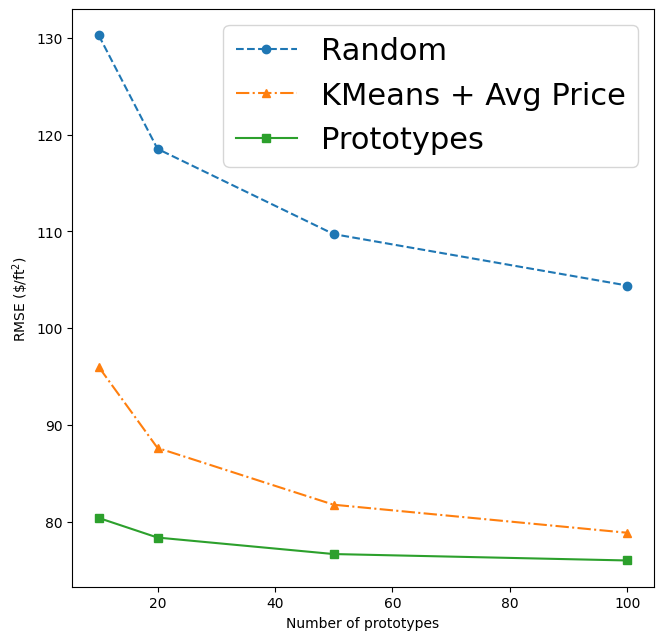

In [23]:
import matplotlib
import matplotlib.pyplot as plt

f = plt.figure(figsize=(7.5,7.5))

plt.plot(df_final[df_final.method=="random_pick"]["n"], df_final[df_final.method=="random_pick"]["test_mse"], '--o')
plt.plot(df_final[df_final.method=="kmeans"]["n"], df_final[df_final.method=="kmeans"]["test_mse"], '-.^')
plt.plot(df_final[df_final.method=="repr"]["n"], df_final[df_final.method=="repr"]["test_mse"], '-s')

font = {'size'   : 22}
matplotlib.rc('font', **font)

plt.xlabel("Number of prototypes")
plt.ylabel("RMSE (\$/ft$^2$)")

plt.legend(['Random', 'KMeans + Avg Price', 'Prototypes'])

